# Multidimensional Scaling

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# what each data point is called:
names = ["football","baseball","basketball","tennis","softball","canoeing","handball","rugby","hockey","ice hockey","swimming","track","boxing","volleyball","lacrosse","skiing","golf","polo","surfing","wrestling","gymnastics"]

 # load the csv provided on bcourses
similarities = np.loadtxt(open("similarities.csv", "rb"), delimiter=",", skiprows=1)


## 1. Distances

Different ways to calculate distance: $$1/similarity$$  $$-1*similarity$$ $$1-similarity$$ 

I would choose 1 - similarity because it preserves the 0 to 1 scale, whereas a calculation like 1/similarity would result in very large distance values for very small similarity values. Overall, the scale would be too large. The second calculation (-similarity) is just a reflection of the similarity value but most of the values would operate in the negatives.

In [124]:
distances = 1 - similarities


D = 2 # How many dimensions we are going to use
N = distances.shape[0] # the number of items
assert(distances.shape[1] == N and N==len(names)) # be sure we loaded as many items as we have names for

## 2. Gradient code

In [126]:
def dist(a,b):
    # Compute the Euclidean distance between two locations (numpy arrays) a and b
    # Thus, dist(pos[1], pos[2]) gives the distance between the locations for items 1 and 2
    
    return np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

In [135]:
def stress(p):
    # Take a matrix of positions (called here "p") and return the stress

    p_size = p.shape[0]
    
    stress_1 = 0
    
    for i in np.arange(0, p_size):
        for j in np.arange(i + 1, p_size):
            stress_1 += (distances[i][j] - dist(p[i], p[j])) ** 2
    
    return stress_1

In [136]:
def add_delta(p, i, d, delta):
    # This is a helper function that will make a new vector which is the same as p (a position matrix), except that
    # p[i,d] has been increased by delta (which may be positive or negative)
    v = np.array(p)
    v[i, d] += delta
    return v

In [137]:
def compute_gradient(p, i, d, delta = 0.001):
    # compute the gradient of the stress function with repect to the [i,d] entry of a position matrix p
    # (e.g. the derivative of stress with respect to the i'th coordinate of the x'th dimension)
    # Here, to compute numerically, you can use the fact that
    # f'(x) = (f(x+delta)-f(x-delta))/(2 delta) as delta -> 0
    
    
    first_matrix = add_delta(p, i, d, delta)
    second_matrix = add_delta(p, i, d, -delta)
    
    gradient = (stress(first_matrix) - stress(second_matrix)) / (2 * delta)
    
    return gradient

In [138]:
def compute_full_gradient(p):
    # Numerically compute the full gradient of stress at a position p
    # This should return a matrix whose elements are the gradient of stress at p 
    # with respect to each [i,d] coordinate

    gradient = []

    for z in np.arange(0, p.shape[0]):
    
        x = compute_gradient(p, z, 0)
        y = compute_gradient(p, z, 1)
        
        gradient += [[x, y]]
    
    return gradient

In [139]:
# Pick a position for each point. Note this is an NxD matrix
# so that pos[11,1] is the y coordinate for the 11th item
# and pos[11] is a (row) vector for the position of the 11th item
pos = np.random.normal(0.0,1.0,size=(N,D))

In [169]:
# Now go through and adjust the position to minimize the stress

positions = pos
step = 0.01
stress_change = []

save = compute_full_gradient(positions)

for steps in range(1000):
    
    grad = compute_full_gradient(positions)
    
    for coord in range(N):
        if grad[coord][0] > 0:
            positions[coord, 0] -= step
        if grad[coord][0] < 0:
            positions[coord, 0] += step
            
        if grad[coord][1] > 0:
            positions[coord, 1] -= step
        if grad[coord][1] < 0:
            positions[coord, 1] += step
            
    stress_change += [stress(positions)]

In [170]:
x_coords = []
y_coords = []

for coord in positions:
    x_coords += [coord[0]]
    y_coords += [coord[1]]


### Resulting graph:

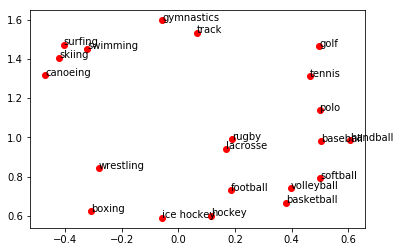

In [171]:
plt.plot(x_coords, y_coords, 'ro', data = names)
for i in range(len(x_coords)):
    plt.annotate(names[i], (x_coords[i], y_coords[i]))
plt.show()

For the most part, this graph actually confirms how I thought this domain would be organized - especially given my limited knowledge of some of these sports, these groupings seem to confirm my guesses about what other sports they resemble. For example, rugby and lacrosse being close together fits my guess about how similar the two sports are. Also, it makes sense that many sports which end in '-ball' seemed to be grouped closely together in the botto right corner. The water/ice sports grouped closely together at the top left fit my predictions about where they would fall on this map. Lastly, wrestling and boxing seem to occupy their own small domain in the bottom left - which makes sense because in my mind they are almost the same sport.

## 3a. Pairwise distances scatter plot

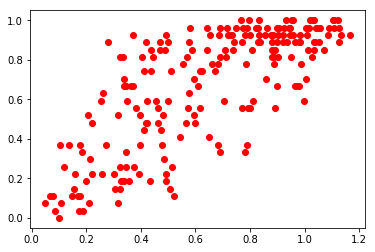

In [172]:
MDS = []
reported = []

for i in np.arange(0, N):
    for j in np.arange(i + 1, N):
        reported += [distances[i][j]]
        MDS += [dist(positions[i], positions[j])]

plt.plot(MDS, reported, 'ro')
plt.show()

To me, this scatter plot looks good and shows that the MDS was successful. There appears to be a positive correlation between the points indicating the relationship between the MDS distances and the psychological distances that were reported by people.

## 3b. Stress

Plot the stress over iterations of your MDS. How should you use this plot in order to figure out how many iterations are needed?

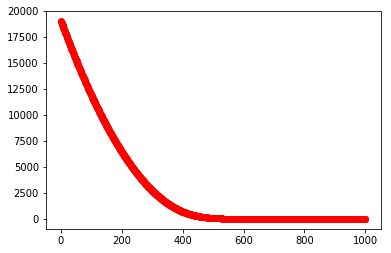

In [173]:
trials = np.arange(1, 1001)

plt.plot(trials, stress_change, 'ro')
plt.show()

This plot indicates where the MDS converges at 0, meaning the the change in stress has reached 0, and the stress is not changing, despite stepping in various directions. Based on this plot above, it is safe to stop iterating at 600 steps, because that is where the plot converges.

### 4. [10pts] Run the MDS code you wrote 5 times and show small plots, starting from random initial positions. Are they all the same or not? Why?

While not all of the five plots below are the exact same, the distances between sports and the clusters are very similar across all of the five plots. This makes sense because regardless of where the clusters are located, what is controlled across across the five plots is the relative distance between the sports. The actual placement of the clusters on the 2-D plane largely depends on where the initial random positions are - it is entirely possible that the points are flipped (reflected) if the random positions also start off roughly reflected. See five plots below.

In [202]:
pos = np.random.normal(0.0,1.0,size=(N,D))

positions = pos
step = 0.01
stress_change = []

save = compute_full_gradient(positions)

for steps in range(600):

    grad = compute_full_gradient(positions)

    for coord in range(N):
        if grad[coord][0] > 0:
            positions[coord, 0] -= step
        if grad[coord][0] < 0:
            positions[coord, 0] += step

        if grad[coord][1] > 0:
            positions[coord, 1] -= step
        if grad[coord][1] < 0:
            positions[coord, 1] += step

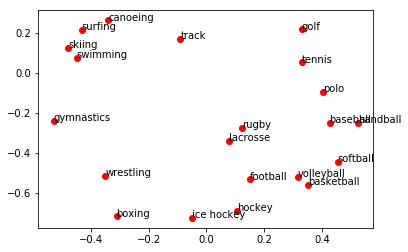

In [189]:
x_coords = []
y_coords = []

for coord in positions:
    x_coords += [coord[0]]
    y_coords += [coord[1]]

plt.plot(x_coords, y_coords, 'ro', data = names)
for i in range(len(x_coords)):
    plt.annotate(names[i], (x_coords[i], y_coords[i]))
plt.show()

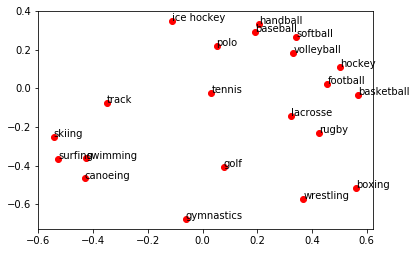

In [190]:
pos = np.random.normal(0.0,1.0,size=(N,D))

positions1 = pos
step = 0.01
stress_change = []

save = compute_full_gradient(positions1)

for steps in range(600):

    grad = compute_full_gradient(positions1)

    for coord in range(N):
        if grad[coord][0] > 0:
            positions1[coord, 0] -= step
        if grad[coord][0] < 0:
            positions1[coord, 0] += step

        if grad[coord][1] > 0:
            positions1[coord, 1] -= step
        if grad[coord][1] < 0:
            positions1[coord, 1] += step

x_coords = []
y_coords = []

for coord in positions1:
    x_coords += [coord[0]]
    y_coords += [coord[1]]

plt.plot(x_coords, y_coords, 'ro', data = names)
for i in range(len(x_coords)):
    plt.annotate(names[i], (x_coords[i], y_coords[i]))
plt.show()        


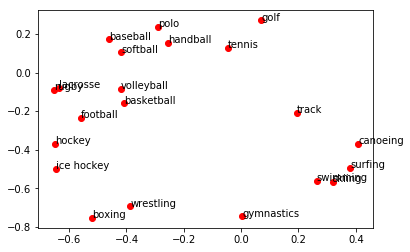

In [191]:
pos = np.random.normal(0.0,1.0,size=(N,D))

positions2 = pos
step = 0.01
stress_change = []

save = compute_full_gradient(positions2)

for steps in range(600):

    grad = compute_full_gradient(positions2)

    for coord in range(N):
        if grad[coord][0] > 0:
            positions2[coord, 0] -= step
        if grad[coord][0] < 0:
            positions2[coord, 0] += step

        if grad[coord][1] > 0:
            positions2[coord, 1] -= step
        if grad[coord][1] < 0:
            positions2[coord, 1] += step

x_coords = []
y_coords = []

for coord in positions2:
    x_coords += [coord[0]]
    y_coords += [coord[1]]

plt.plot(x_coords, y_coords, 'ro', data = names)
for i in range(len(x_coords)):
    plt.annotate(names[i], (x_coords[i], y_coords[i]))
plt.show()  

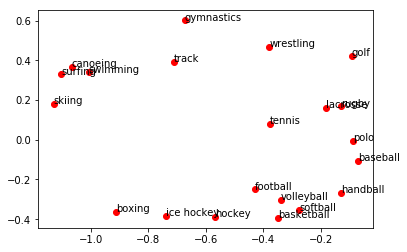

In [194]:
pos = np.random.normal(0.0,1.0,size=(N,D))

positions4 = pos
step = 0.01

save = compute_full_gradient(positions4)

for steps in range(600):

    grad = compute_full_gradient(positions4)

    for coord in range(N):
        if grad[coord][0] > 0:
            positions4[coord, 0] -= step
        if grad[coord][0] < 0:
            positions4[coord, 0] += step

        if grad[coord][1] > 0:
            positions4[coord, 1] -= step
        if grad[coord][1] < 0:
            positions4[coord, 1] += step

x_coords = []
y_coords = []

for coord in positions4:
    x_coords += [coord[0]]
    y_coords += [coord[1]]

plt.plot(x_coords, y_coords, 'ro', data = names)
for i in range(len(x_coords)):
    plt.annotate(names[i], (x_coords[i], y_coords[i]))
plt.show()  

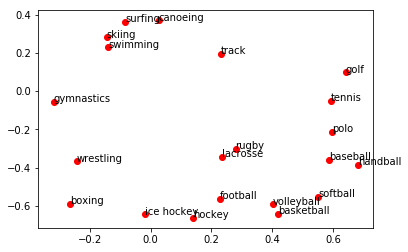

In [193]:
pos = np.random.normal(0.0,1.0,size=(N,D))

positions3 = pos
step = 0.01

save = compute_full_gradient(positions3)

for steps in range(600):

    grad = compute_full_gradient(positions3)

    for coord in range(N):
        if grad[coord][0] > 0:
            positions3[coord, 0] -= step
        if grad[coord][0] < 0:
            positions3[coord, 0] += step

        if grad[coord][1] > 0:
            positions3[coord, 1] -= step
        if grad[coord][1] < 0:
            positions3[coord, 1] += step

x_coords = []
y_coords = []

for coord in positions3:
    x_coords += [coord[0]]
    y_coords += [coord[1]]

plt.plot(x_coords, y_coords, 'ro', data = names)
for i in range(len(x_coords)):
    plt.annotate(names[i], (x_coords[i], y_coords[i]))
plt.show()  

### 5. [5pts] If you wanted to find one “best” answer but had run MDS 5 times, how would you pick the best? Why? Show a plot of the best and any code you used to find it.

I would compare the relative stresses. See code below. I would do this because stress is the best indicator of how precise a graph regarding the difference between psychological space and physical space. Based on the comparison, the third graph with the stress value in the middle (stress = 8.793522701002809) has the least amount of stress, so I will pick this as the best plot.

In [198]:
def stress(p):

    p_size = len(p)
    
    stress_1 = 0
    
    for i in np.arange(0, p_size):
        for j in np.arange(i + 1, p_size):
            stress_1 += (distances[i][j] - dist(p[i], p[j])) ** 2
    
    return stress_1

In [203]:
post_list = [positions, positions1, positions2, positions3, positions4]

stress_list = []

for pos in post_list:
    stress_list += [stress(pos)]

In [211]:
print(stress_list)

[9.9938239971984242, 10.356893312318894, 8.793522701002809, 8.7940793489802118, 9.9921060763798888]


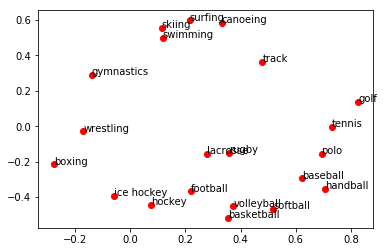

In [210]:
x_coords = []
y_coords = []

for coord in positions2:
    x_coords += [coord[0]]
    y_coords += [coord[1]]

plt.plot(x_coords, y_coords, 'ro', data = names)
for i in range(len(x_coords)):
    plt.annotate(names[i], (x_coords[i], y_coords[i]))
plt.show()  